Function to use Alpha advantage stock data, if necessary/desired. It makes a DataFrame with all (and just) adjusted closes of the tickers provided.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib style
plt.style.use('seaborn')

In [2]:
Tickers = ['SPY', 'TLT']
Quotes = pd.DataFrame()

Start_date = '2002-12-30'

# Download
for ticker in Tickers:
    Quote = pd.DataFrame(pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + ticker + '&outputsize=full&apikey=NAK2M0OA01938GU8&datatype=csv',
                                     index_col = 'timestamp', parse_dates = True)['adjusted_close'])
    Quote.columns = [ticker]
    Quotes = Quotes.merge(Quote, left_index = True, right_index = True, how='outer')
    
Quotes = Quotes.loc[Start_date:]

In [3]:
Quotes.head()

,SPY,TLT
timestamp,,
2002-12-30,65.7212,51.0785
2002-12-31,65.8107,50.9505
2003-01-02,67.9290,49.6331
2003-01-03,68.1379,49.7482
2003-01-06,69.3388,49.6159


In [4]:
Quotes.tail()

,SPY,TLT
timestamp,,
2017-10-03,252.860,124.40
2017-10-04,253.160,124.41
2017-10-05,254.660,123.94
2017-10-06,254.370,123.59
2017-10-09,254.015,123.99


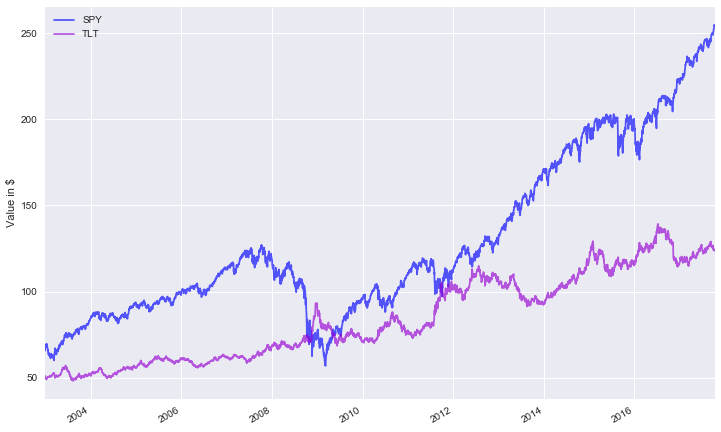

In [5]:
Quotes.plot(figsize=(12, 8), color=['blue', 'darkviolet'], alpha=0.65)
plt.xlabel('')
plt.ylabel('Value in $')
plt.show()